In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BISECTION_DATA_HOME = "/Users/katyabrooun/Google Drive/Shared drives/hydra/data-analysis/Bisection_Full/"
SAVE_DIR_CONTRACTION = BISECTION_DATA_HOME + "Contraction_Analysis/"
SAVE_DIR = '/Users/katyabrooun/Fairhall_Lab/hydra/bisection-data-analysis/exp6'

FPS = 5

In [3]:
prebisect = "71420_ngcamp_hy6_prebisect"
oral = "71420_ngcamp_hy6_oral48hr"
ped = "71420_ngcamp_hy6_peduncle48hr"
hr = "48hr"

## Helper functions

In [4]:
def read_cb_file(vid):
    return pd.read_csv(SAVE_DIR_CONTRACTION + vid + "_cb_bounds.csv")["bounds"]

In [5]:
def get_num_frames(vid, bodypart):
    fluo = pd.read_csv(SAVE_DIR + bodypart + 'total_fluo_' + vid + '.csv')
    length = pd.read_csv(SAVE_DIR + bodypart + "lengths_" + vid + ".csv")
    return min(len(fluo),len(length))

In [6]:
def get_num_cbs(cbs):
    return len(cbs)/2

In [7]:
def get_freq(num_events, num_frames):
    """Number of CB events per hour"""
    num_hours = (num_frames/FPS)/3600
    return num_events/ num_hours

In [8]:
def get_intervals(cbs):
    """intervals in mins"""
    intervals = []
    for i in range(1, len(cbs)-2, 2):
        interval = cbs[i+1]-cbs[i]
        interval_in_mins = interval / FPS/ 60
        intervals.append(interval_in_mins)
    return intervals

In [9]:
def get_cb_freq_per_chunk(num_frames,cbs):
    """ Chunk size = 10 mins""" 
    chunk_len = 60 * FPS * 10 # Number of frames in 10 mins
    j = 0
    freq_per_chunk = []
    curr_count = 0
    for i in range(0,num_frames,chunk_len):
        curr_max = i+chunk_len
        if i + chunk_len > num_frames:
            curr_len = curr_max - num_frames
        else:
            curr_len = chunk_len
        while j < len(cbs) and cbs[j] < curr_max:
            if cbs[j] < curr_max:
                curr_count += 1
                # only looking at starts of cb intervals
                j += 2
            else:
                break
        curr_mins = curr_len/60/FPS
        freq_per_chunk.append(curr_count/curr_mins)
        curr_count = 0

    return freq_per_chunk

## Stats

### Gather stats for prebisect

In [10]:
prebisect_num_frames = get_num_frames(prebisect, "/")
prebisect_cbs = read_cb_file(prebisect)

prebisect_num_cbs = len(prebisect_cbs)/2

prebisect_intervals = get_intervals(prebisect_cbs)
prebisect_cb_freq_per_chunk = get_cb_freq_per_chunk(prebisect_num_frames,prebisect_cbs)

### Gather stats for two halves

In [11]:
oral_cbs = pd.read_csv(SAVE_DIR_CONTRACTION + oral + "_cb_bounds.csv")["bounds"]
ped_cbs = pd.read_csv(SAVE_DIR_CONTRACTION + ped + "_cb_bounds.csv")["bounds"]
oral_num_cbs = len(oral_cbs)/2
ped_num_cbs = len(ped_cbs)/2


oral_intervals = get_intervals(oral_cbs)
ped_intervals = get_intervals(ped_cbs)


oral_num_frames = get_num_frames(oral, "/Hypostome/")
ped_num_frames = get_num_frames(ped, "/Peduncle/")

oral_cb_freq_per_chunk = get_cb_freq_per_chunk(oral_num_frames,oral_cbs)
ped_cb_freq_per_chunk = get_cb_freq_per_chunk(ped_num_frames,ped_cbs)

## Graphs

In [17]:
vids=["Prebisect", "Hypostome " + hr, "Peduncle " + hr]

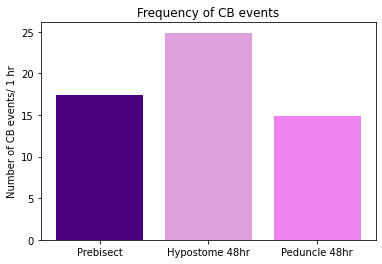

In [21]:
freqs_24hr = [get_freq(prebisect_num_cbs, prebisect_num_frames),\
              get_freq(oral_num_cbs,oral_num_frames),\
              get_freq(ped_num_cbs,ped_num_frames)]
plt.bar([1,2,3],freqs_24hr,tick_label=vids,color=["indigo","plum","violet"])
plt.ylabel("Number of CB events/ 1 hr")
plt.title("Frequency of CB events")
plt.show()

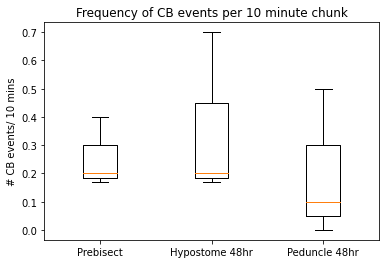

In [14]:
plt.boxplot(x = [prebisect_cb_freq_per_chunk,oral_cb_freq_per_chunk,ped_cb_freq_per_chunk],\
           labels=vids)
plt.ylabel("# CB events/ 10 mins")
plt.title("Frequency of CB events per 10 minute chunk")
plt.show()

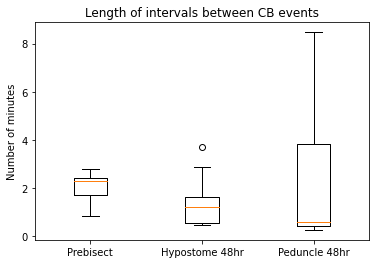

In [15]:
plt.boxplot(x = [prebisect_intervals,oral_intervals,ped_intervals], \
           labels=vids)
plt.ylabel("Number of minutes")
plt.title("Length of intervals between CB events")
plt.show()